In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
#!pip install package #for install packages

In [3]:
sys = pd.read_csv('SYS.csv')
sys

,Time,Open,High,Low,Close,Volume
0,"Jan 1, 2018",75.50,75.50,75.00,75.00,4000
1,"Jan 2, 2018",74.85,76.00,73.11,75.32,197500
2,"Jan 3, 2018",74.03,74.60,72.30,72.75,21000
3,"Jan 4, 2018",71.03,74.50,71.03,74.01,381500
4,"Jan 5, 2018",74.35,77.00,71.00,76.52,180500
...,...,...,...,...,...,...
238,"Dec 24, 2018",106.00,110.00,106.00,109.60,126500
239,"Dec 26, 2018",108.74,112.00,107.00,108.14,87000
240,"Dec 27, 2018",110.49,110.49,107.00,108.61,400000
241,"Dec 28, 2018",109.99,113.00,103.18,106.37,449000


<AxesSubplot:xlabel='Time'>

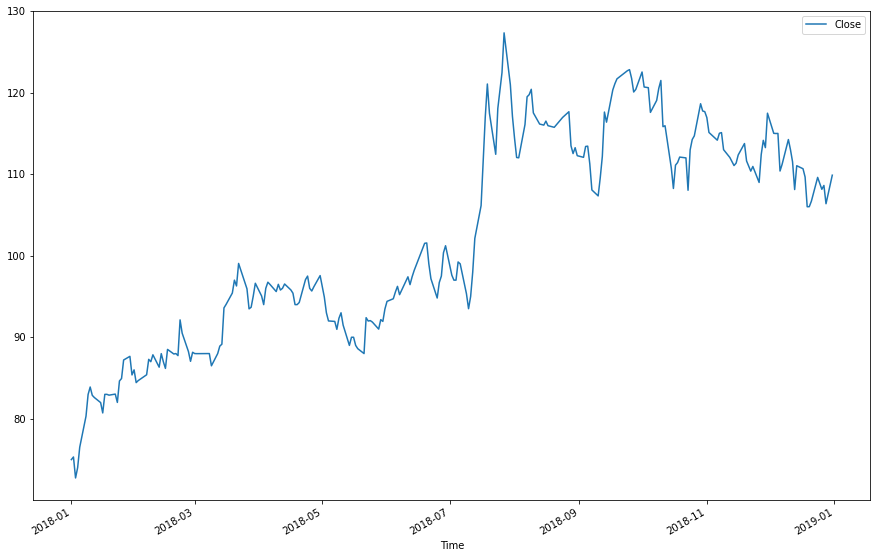

In [4]:
sys['Time'] = pd.to_datetime(sys["Time"]) # correct the format of date
sys = sys.set_index("Time") # Set the column as raw index
sys['Close'].plot(legend = True, figsize=(15,10))

              Open    High     Low   Close  Volume  mv_avg for 50 days
Time                                                                  
2018-01-01   75.50   75.50   75.00   75.00    4000                 NaN
2018-01-02   74.85   76.00   73.11   75.32  197500                 NaN
2018-01-03   74.03   74.60   72.30   72.75   21000                 NaN
2018-01-04   71.03   74.50   71.03   74.01  381500                 NaN
2018-01-05   74.35   77.00   71.00   76.52  180500                 NaN
...            ...     ...     ...     ...     ...                 ...
2018-12-24  106.00  110.00  106.00  109.60  126500            112.4658
2018-12-26  108.74  112.00  107.00  108.14   87000            112.3122
2018-12-27  110.49  110.49  107.00  108.61  400000            112.1658
2018-12-28  109.99  113.00  103.18  106.37  449000            112.0784
2018-12-31  105.88  110.50  105.75  109.87  408500            112.1110

[243 rows x 6 columns]


<AxesSubplot:xlabel='Time'>

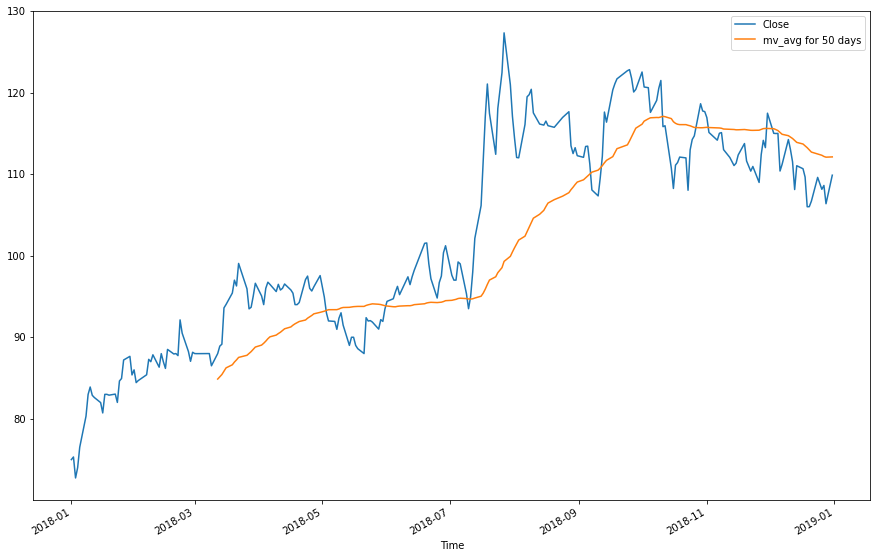

In [5]:
days = 50 # Moving Average window
col_name = "mv_avg for " + str(days) + " days" # New column to store moving average values

sys[col_name] = sys['Close'].rolling(days).mean() # Calculating moving average

print(sys)

sys[['Close', col_name]].plot(figsize = (15, 10)) # Plotting the closing price with moving average comparison

<AxesSubplot:xlabel='Time'>

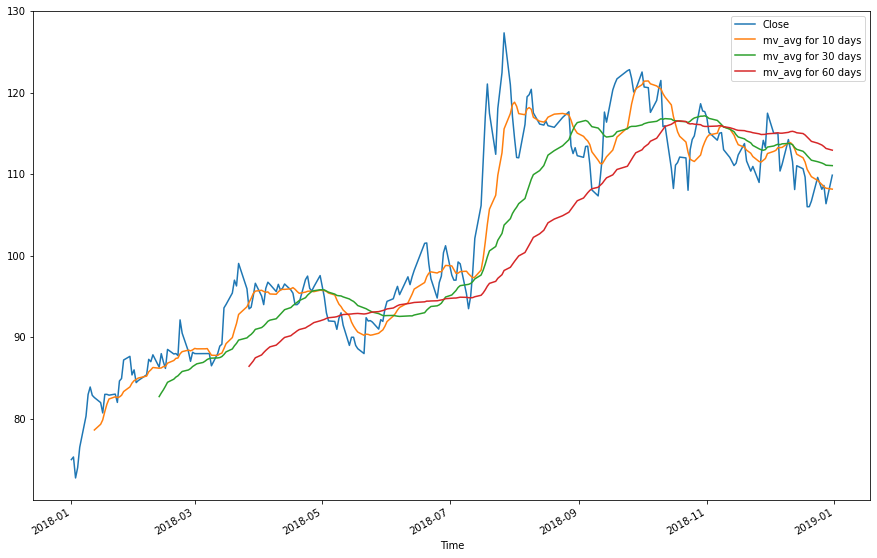

In [6]:
days = [10, 30, 60]

for day in days:
        col_name = "mv_avg for " + str(day) + " days"
        sys[col_name] = sys['Close'].rolling(day).mean()

sys[['Close', 'mv_avg for 10 days', 'mv_avg for 30 days', 'mv_avg for 60 days']].plot(subplots = False, figsize =(15,10))

<AxesSubplot:xlabel='Time', ylabel='Percentage Change'>

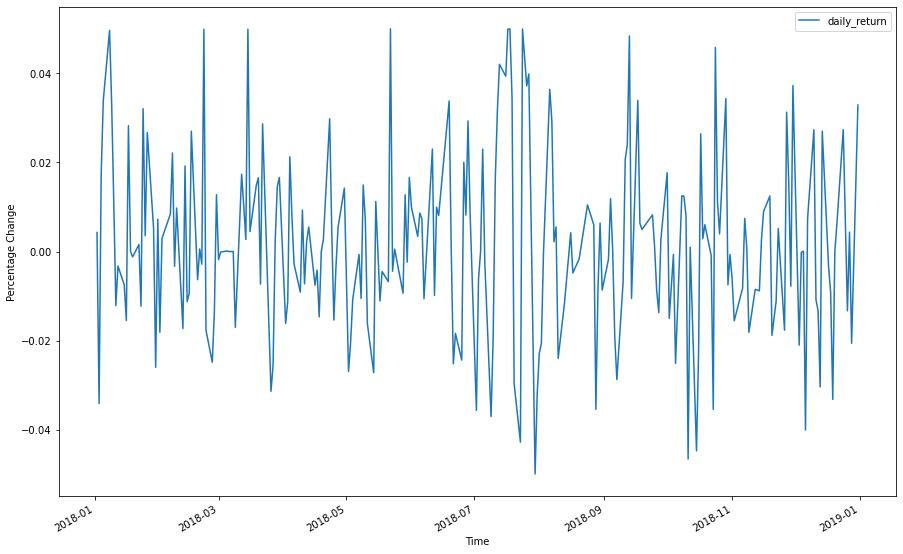

In [7]:
daily_return = sys['Close'].pct_change() # Calculate the daily returns

sys['daily_return'] = daily_return # Create a new column and assign daily return values to it

plt.pyplot.ylabel('Percentage Change') # Assign a name to the y-axis of plot

sys['daily_return'].plot(legend = True, figsize=(15,10)) # Plot the daily return values

/home/alejandro.hassan/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_return', ylabel='Probability Density Value'>

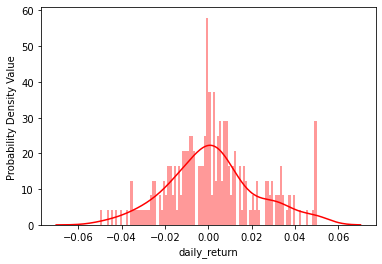

In [8]:
plt.pyplot.ylabel('Probability Density Value') # Assign a name to the y-axis of plot

sns.distplot(sys['daily_return'].dropna(), bins = 100, color = 'red') # Plots a distribution graph of KDE and histogram

In [9]:
#Correlation score #

import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys = pd.read_csv('SYS.csv')
ns = pd.read_csv('NETSOL.csv')
ptc = pd.read_csv('PTC.csv')
avn = pd.read_csv('AVN.csv')


sys['Time'] = pd.to_datetime(sys['Time'])
ns['Time'] = pd.to_datetime(ns['Time'])
ptc['Time'] = pd.to_datetime(ptc['Time'])
avn['Time'] = pd.to_datetime(avn['Time'])

sys = sys.set_index('Time')
ns = ns.set_index('Time')
ptc = ptc.set_index('Time')
avn = avn.set_index('Time')
## Try printing the data of any company
print(sys)

              Open    High     Low   Close  Volume
Time                                              
2018-01-01   75.50   75.50   75.00   75.00    4000
2018-01-02   74.85   76.00   73.11   75.32  197500
2018-01-03   74.03   74.60   72.30   72.75   21000
2018-01-04   71.03   74.50   71.03   74.01  381500
2018-01-05   74.35   77.00   71.00   76.52  180500
...            ...     ...     ...     ...     ...
2018-12-24  106.00  110.00  106.00  109.60  126500
2018-12-26  108.74  112.00  107.00  108.14   87000
2018-12-27  110.49  110.49  107.00  108.61  400000
2018-12-28  109.99  113.00  103.18  106.37  449000
2018-12-31  105.88  110.50  105.75  109.87  408500

[243 rows x 5 columns]


In [10]:
#correlation with closing price

df = pd.DataFrame({
    'SYS': sys['Close'],
    'NS': ns['Close'],
    'PTC': ptc['Close'],
    'AVN': avn['Close']
})

print("The New DataFrame\n", df.head(), "\n")

corr = (df.dropna()).corr() # Calculating correlation after dropping null values

print("The correlations\n", corr, "\n")

The New DataFrame
               SYS     NS    PTC    AVN
Time                                  
2018-01-01  75.00  64.38  13.34  35.18
2018-01-02  75.32  65.38  13.21  35.07
2018-01-03  72.75  64.00  13.12  35.29
2018-01-04  74.01  65.90  13.74  35.52
2018-01-05  76.52  67.54  13.50  37.19 

The correlations
           SYS       NS       PTC       AVN
SYS  1.000000  0.78341 -0.787943  0.901075
NS   0.783410  1.00000 -0.703370  0.741200
PTC -0.787943 -0.70337  1.000000 -0.844307
AVN  0.901075  0.74120 -0.844307  1.000000 



<AxesSubplot:>

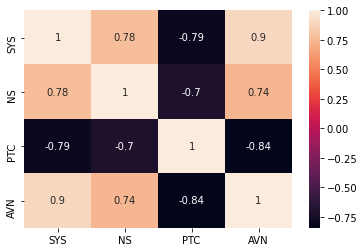

In [11]:
#correlation with closing price

df = pd.DataFrame({
    'SYS': sys['Close'],
    'NS': ns['Close'],
    'PTC': ptc['Close'],
    'AVN': avn['Close']
})

corr = (df.dropna()).corr() # Calculating correlation after dropping null values

sns.heatmap(corr, annot = True) # Plotting heatmap, annot if for Annotate each cell with the numeric value

                 SYS        NS       PTC       AVN
Time                                              
2018-01-01       NaN       NaN       NaN       NaN
2018-01-02  0.004267  0.015533 -0.009745 -0.003127
2018-01-03 -0.034121 -0.021107 -0.006813  0.006273
2018-01-04  0.017320  0.029688  0.047256  0.006517
2018-01-05  0.033914  0.024886 -0.017467  0.047016
...              ...       ...       ...       ...
2018-12-24  0.027372 -0.000499 -0.006148  0.015297
2018-12-26 -0.013321  0.007863  0.006186  0.036624
2018-12-27  0.004346 -0.048793 -0.003074  0.006853
2018-12-28 -0.020624 -0.049993 -0.009250 -0.006220
2018-12-31  0.032904 -0.048513 -0.003112 -0.023618

[247 rows x 4 columns]


<AxesSubplot:>

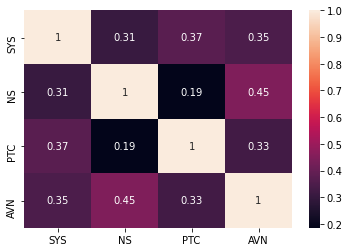

In [12]:
#correlation with daily returns #

df = pd.DataFrame({
    'SYS': sys['Close'],
    'NS': ns['Close'],
    'PTC': ptc['Close'],
    'AVN': avn['Close']
})

all_returns = df.pct_change()
print(all_returns)

corr = (all_returns.dropna()).corr() # Calculating correlation after dropping null values

sns.heatmap(corr, annot = True) # Plotting heatmap, annot if for Annotate each cell with the numeric value

In [13]:
# Risk #

ret = all_returns.dropna() # drop the null values

avg_daily_return = ret.mean() # Take mean of the daily return of all companies

print("Average daily return of companies\n", avg_daily_return, "\n")

daily_risk = ret.std() # Take standard deviation of the daily return of all companies

print("\nDaily Risk or standard deviation of companies\n", daily_risk)

Average daily return of companies
 SYS    0.001755
NS     0.000897
PTC   -0.001173
AVN    0.003843
dtype: float64 


Daily Risk or standard deviation of companies
 SYS    0.020158
NS     0.034407
PTC    0.017892
AVN    0.027037
dtype: float64


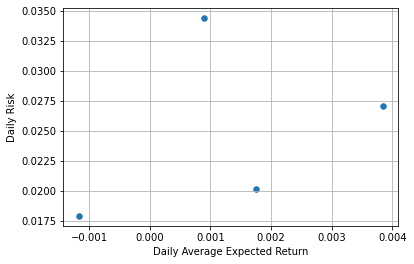

In [14]:
ret = all_returns.dropna() # drop the null values

avg_daily_return = ret.mean() # Take mean of the daily return of all companies
daily_risk = ret.std() # Take standard deviation of the daily return of all companies

plt.xlabel("Daily Average Expected Return") # Name the x-axis
plt.ylabel("Daily Risk") # Name the y-axis

plt.grid() # Add grid lines on the plot

plt.scatter(avg_daily_return, daily_risk, s = 30) # Plot the scatter plot for risk & return 

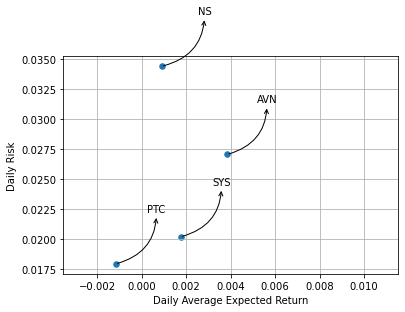

In [15]:
ret = all_returns.dropna()
avg_daily_return = ret.mean()
daily_risk = ret.std()

plt.xlabel("Daily Average Expected Return") # Name the x-axis
plt.ylabel("Daily Risk") # Name the y-axis


plt.xlim(avg_daily_return.min()* 3, avg_daily_return.max() * 3)

for label, x, y in zip(ret.columns, ret.mean(), ret.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext= (50, 50),
        textcoords = 'offset points', ha = 'right', va= 'bottom',
        arrowprops = dict(arrowstyle = '<-', connectionstyle = 'arc3,rad=-0.4')
    )
plt.grid()
plt.scatter(avg_daily_return, daily_risk, s = 30)

In [16]:
all_returns = df.pct_change()
investment = 100000

loss = (abs(all_returns.quantile(0.1))) * investment
print(loss)

SYS    2344.682683
NS     4948.152026
PTC    1909.463216
AVN    3163.165179
Name: 0.1, dtype: float64


In [17]:
# Montecarlo simulations #
# This method uses randomness to solve problems. It converts the randomness in the variables into probability distributions.

# The following is the formula for MonteCarlo simulations:

# S_{t+1} = S_{t}*e^{Drift+Rv}S

# Drift = AveragedDailyReturn - DailyReturnVariance/2Drift = AverageDailyReturn - DailyReturnVariance / 2

# Rv= STD*NORMSINV(RAND()) Rv=NORMSINV(RAND())

In [18]:
# Calculating drift #

# Preprocessing steps as pefore
sys = pd.read_csv('SYS.csv')
sys['Time'] = pd.to_datetime(sys['Time'])
sys = sys.set_index('Time')

daily_returns = sys['Close'].pct_change() # Calculating daily returns

# Calculating Log returns from daily returns
log_returns = np.log(1 + daily_returns)

avg = log_returns.mean() # Calculating the average of Log returns
var = log_returns.var() # Calculating the variance

drift = avg - ( var / 2.0) # Calculating drift
drift = np.array(drift) # Convert to array

print("The calculated Drift is : ", drift)

The calculated Drift is :  0.0013727067354237406


In [19]:
from scipy.stats import norm

pred_price_overDays = 60 # Number of days
pred_count = 10 # Range of prediction

std = log_returns.std() # Calculating STD
std = np.array(std) # Convert to array

x = np.random.rand(pred_price_overDays, pred_count) # get random multidimensional array

Rv = std * norm.ppf(x) # Calculating Rv -------> RELATIVE VARIANCE

print("The required Rv array is:\n", Rv)

The required Rv array is:
 [[ 1.82497090e-02  1.18100760e-02 -2.44527612e-02  2.59934469e-02
   3.05278158e-02 -2.13566008e-02  2.38544395e-02  1.88935971e-02
   8.54433999e-03  1.97811244e-02]
 [ 7.02860887e-02 -2.65565126e-04 -1.38119338e-02 -8.13096655e-03
  -2.19057553e-02  3.40417007e-02  1.24081641e-02  2.57563465e-02
   2.99397327e-03 -5.27473545e-03]
 [-2.03624839e-02 -1.70825615e-02  1.58988341e-02 -3.47983323e-03
   5.32563947e-03  1.52013915e-02 -5.83095823e-03 -2.56095470e-02
  -2.80704879e-03  2.12033300e-02]
 [ 2.00189569e-02  1.85714712e-02 -2.60702770e-02 -1.75559465e-02
  -5.21597403e-03  7.50626078e-03  1.98736624e-02 -5.59663155e-04
   1.37575010e-02 -1.08669996e-02]
 [-2.36522612e-03  2.15635359e-02 -3.52518023e-02 -9.32530666e-03
   2.04281502e-02 -1.98874037e-03  1.04007312e-02  3.15619457e-02
  -5.23138280e-04 -2.68121134e-02]
 [ 3.58016982e-02 -4.02559601e-02  2.78110547e-02  3.81733429e-02
   1.11835257e-02 -6.84047806e-03  1.59762981e-02  5.27153434e-03
  -2.0

In [20]:
e_value = np.exp(drift + Rv) # Calculating the E value

current_price = sys['Close'].iloc[-1] # Selecting last price of the year

new_prices = np.zeros_like(e_value) # create array to store the results

new_prices[0] = current_price

print(new_prices)

[[109.87 109.87 109.87 109.87 109.87 109.87 109.87 109.87 109.87 109.87]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.   

The Minimum Predicted Price: 90.45470633174769
The Maximum Predicted Price: 166.02896166118103

The price array:
 [[109.87       109.87       109.87       109.87       109.87
  109.87       109.87       109.87       109.87       109.87      ]
 [118.03210269 109.99170901 108.51176731 109.12997346 107.63703718
  113.83069992 111.39458521 112.89146856 110.35081615 109.44211945]
 [115.81184716 108.27725739 110.40221118 108.9002649  108.36044744
  115.73306255 110.89906553 110.18822742 110.1926488  111.94098992]
 [118.31594315 110.4584369  107.70894033 107.15208952 107.94478853
  116.76522815 113.28047661 110.27785168 111.87256315 110.88321872]
 [118.19857054 113.02121632 104.12098045 106.30333122 110.3239167
  116.69331899 114.62205929 113.97028514 111.96764693 108.09799288]
 [122.67522501 108.71092584 107.2043963  110.59143804 111.71790273
  116.0570078  116.62798807 114.73005243 111.89316423 106.98173747]
 [116.45404843 106.52265646 110.88335645 112.52000235 111.28309624
  112.59864205 1

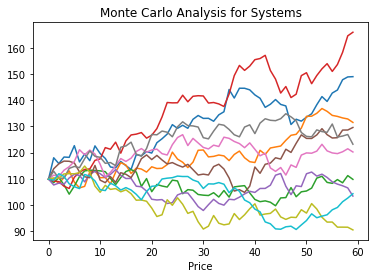

In [21]:
for i in range(1, pred_price_overDays): # Loop over all the days to find their prices
    new_prices[i] = new_prices[i - 1] * e_value[i] # Calculating the future price with formula
    
    
print("The Minimum Predicted Price:", new_prices[pred_price_overDays-1].min()) # Get minimum price
print("The Maximum Predicted Price:", new_prices[pred_price_overDays-1].max()) # Get maximum price

plt.xlabel('Days') # Assign name to x-axis
plt.xlabel('Price') # Assign name to y-axis
plt.title('Monte Carlo Analysis for Systems') # Assign name to the plot
plt.plot(new_prices) # plot the figure

print("\nThe price array:\n", new_prices)

In [22]:
sys.shape[1]

5